# Import Python Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import Data from CSV File

In [7]:
df = pd.read_csv('D:/Projects/ML_Practice_Projects/customerChurnModelling/notebook/data/customerChurnModelling.csv')

# Data Cleaning

In [18]:
# Drop non-predictable columns - RowNumber, CustomerId, Surname
columnsToDrop = ['RowNumber','CustomerId','Surname']
df.drop(columnsToDrop, axis=1, inplace=True)

# Exploratory Data Analysis

In [19]:
# Inspect Head
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [20]:
# Inspect Tail
df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


# Observation

- All the column names are already standardized
- Columns RowNumber, CustomerId, Surname can be dropped
- We can perform both Classification and Regression problems
    - Binary Classification - Exited
    - Multi-class Classification - Satisfaction Score
    - Regression Problem - Points Earned, CreditScore

In [21]:
# Inspect Structure
df.shape

(10000, 15)

# Observation

- Dataset has 10k rows and 18 columns

In [11]:
# Inspect Variablesname
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [12]:
# Inspect Variablename and their datatype
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [13]:
# Inspect Non-Missing Values
df.count()

RowNumber             10000
CustomerId            10000
Surname               10000
CreditScore           10000
Geography             10000
Gender                10000
Age                   10000
Tenure                10000
Balance               10000
NumOfProducts         10000
HasCrCard             10000
IsActiveMember        10000
EstimatedSalary       10000
Exited                10000
Complain              10000
Satisfaction Score    10000
Card Type             10000
Point Earned          10000
dtype: int64

In [14]:
# Inspect Unique Values
df.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [15]:
# Inspect Meta-Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

# Descriptive Statistics Summary

In [22]:
# Numeric Variables
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [23]:
# Categorical Variables
df.describe(include='object')

,Geography,Gender,Card Type
count,10000,10000,10000
unique,3,2,4
top,France,Male,DIAMOND
freq,5014,5457,2507


# Handling Duplicates

In [25]:
df.duplicated().sum()

0

# Handling Missing Values

In [27]:
df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

# Separate Numeric and Categorical Columns

In [33]:
# Separate int64, float64, and categorical columns
int_columns = df.select_dtypes(include='int64').columns
float_columns = df.select_dtypes(include='float64').columns
categorical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

print("\nInteger Columns:", int_columns)
#print(df[int_columns])

print("\nFloat Columns:", float_columns)
#print(df[float_columns])

print("\nCategorical Columns:", categorical_columns)
#print(df[categorical_columns])


Integer Columns: Index(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score',
       'Point Earned'],
      dtype='object')

Float Columns: Index(['Balance', 'EstimatedSalary'], dtype='object')

Categorical Columns: Index(['Geography', 'Gender', 'Card Type'], dtype='object')


# Univariate Analysis

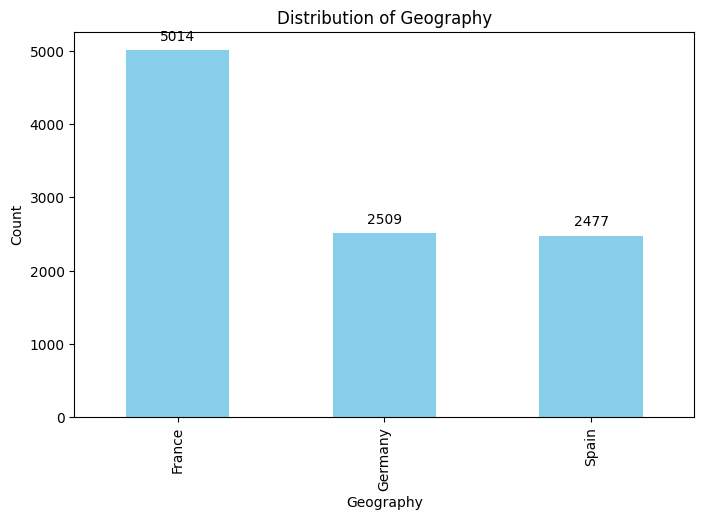

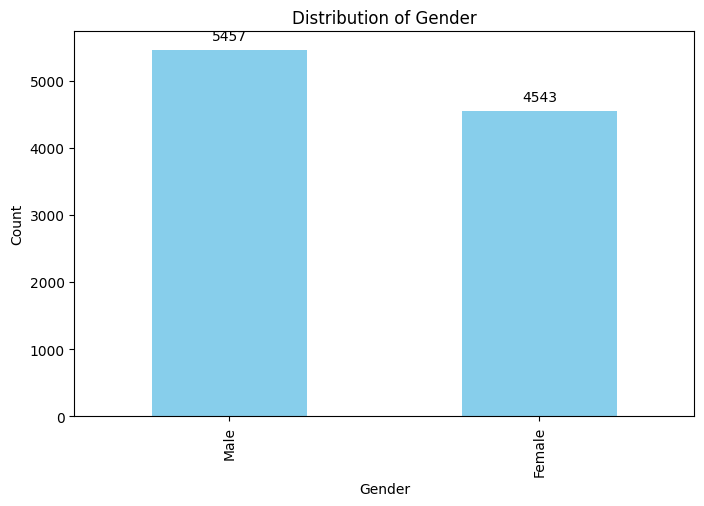

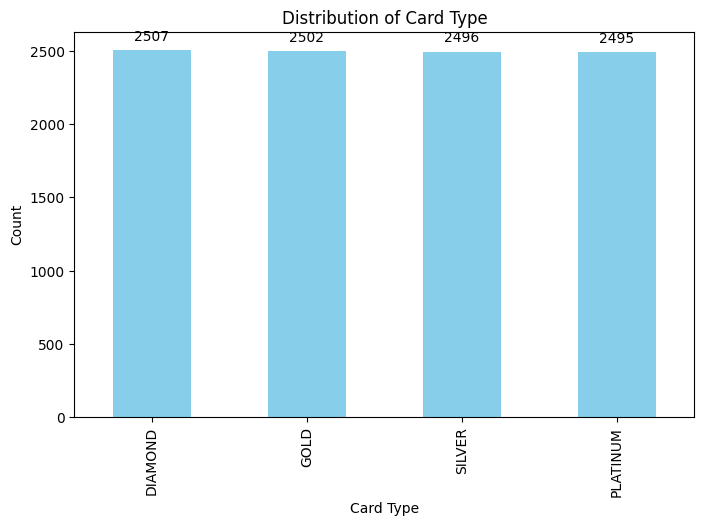

In [38]:
# Visualize distribution of categorical columns with data labels
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    ax = df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title("Distribution of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")

    # Add data labels
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()

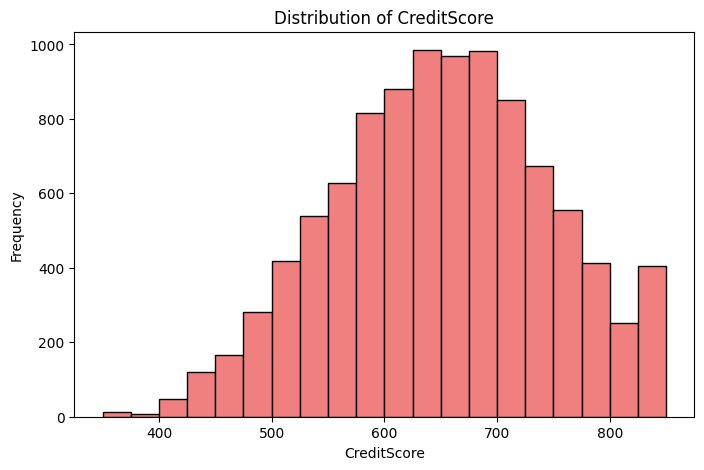

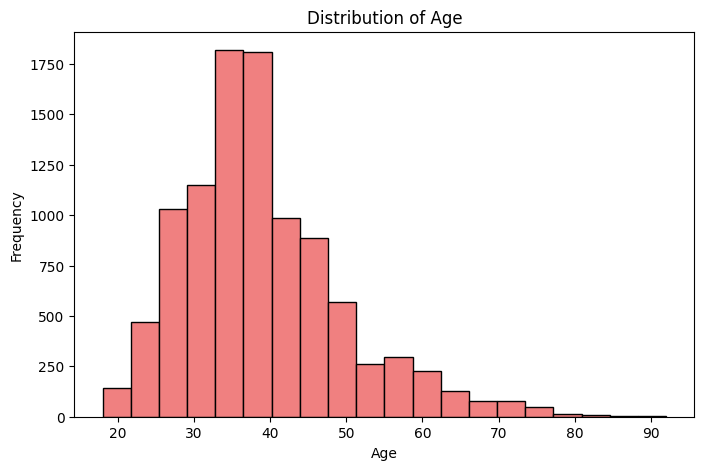

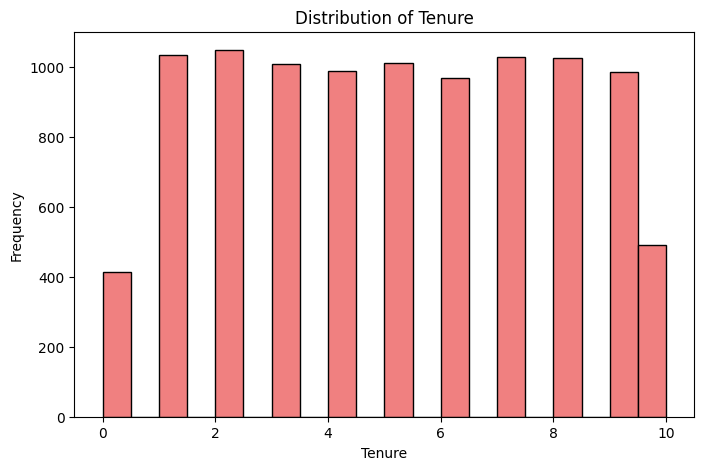

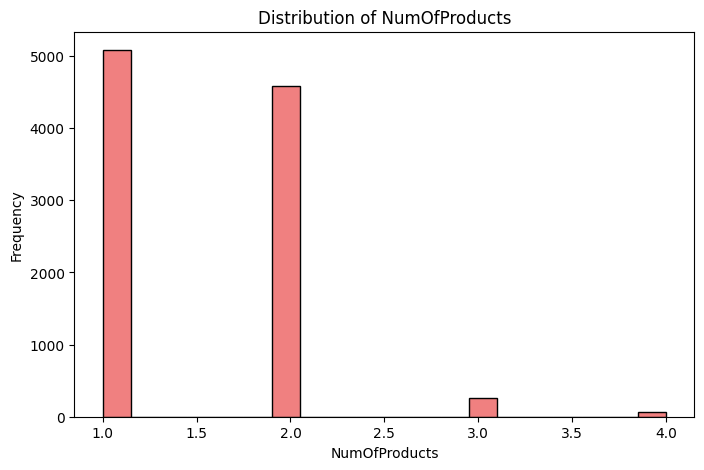

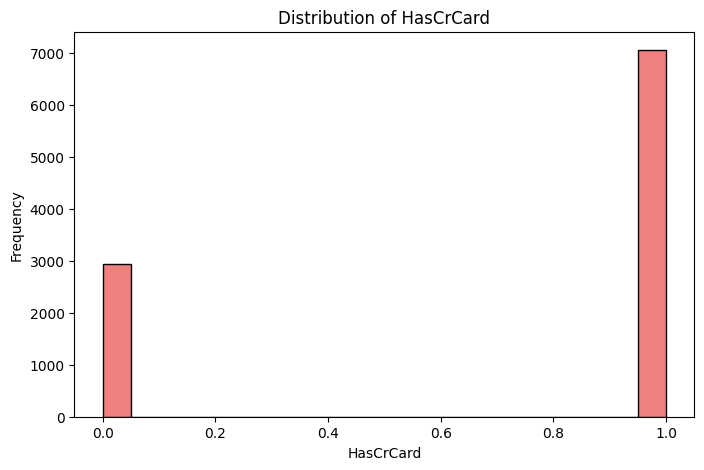

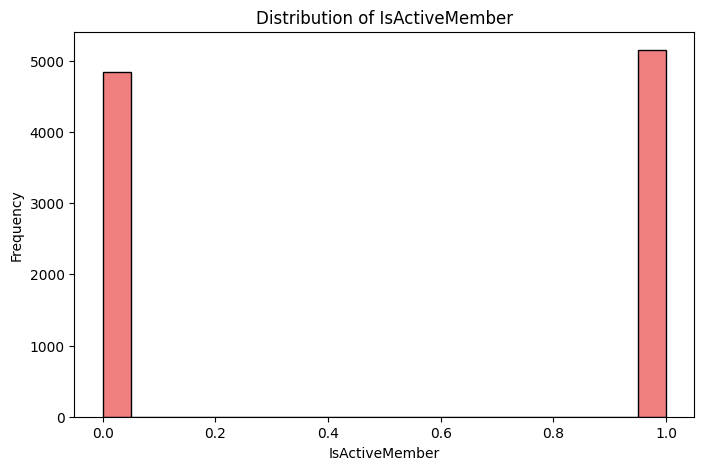

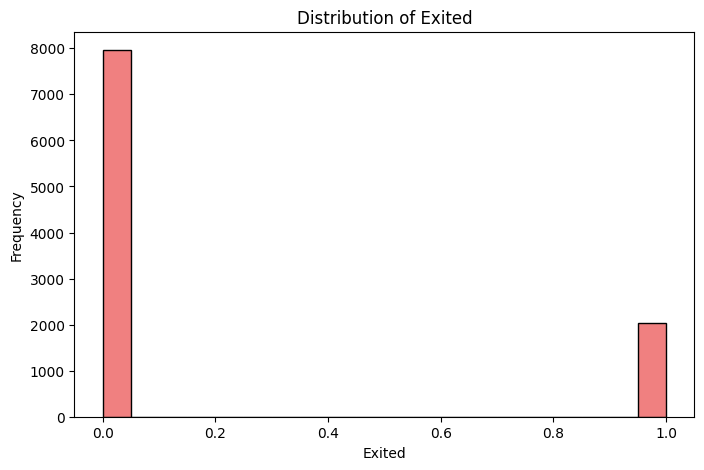

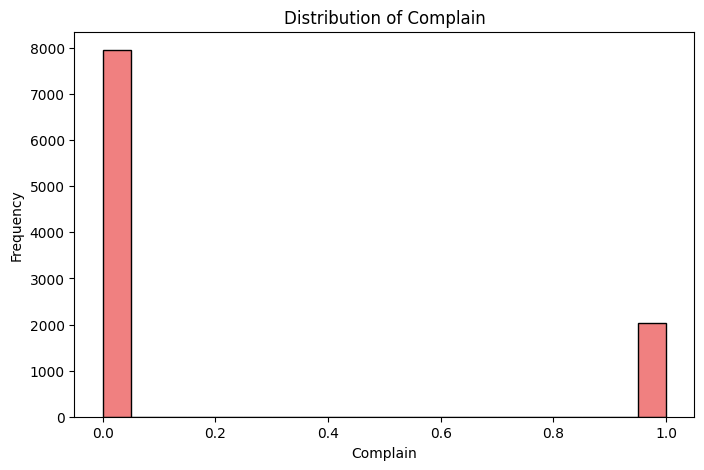

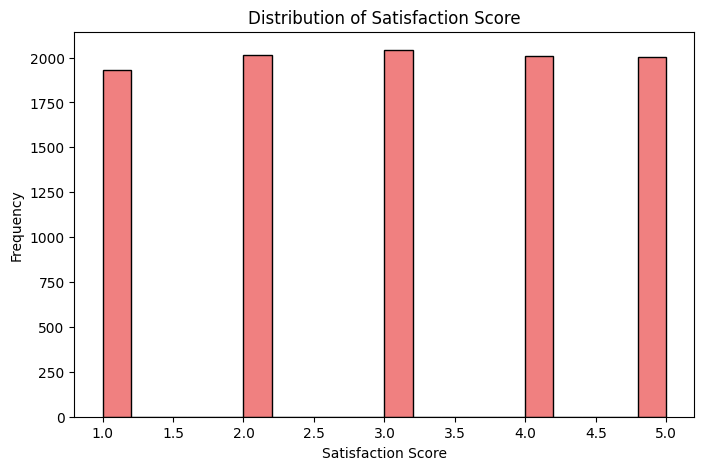

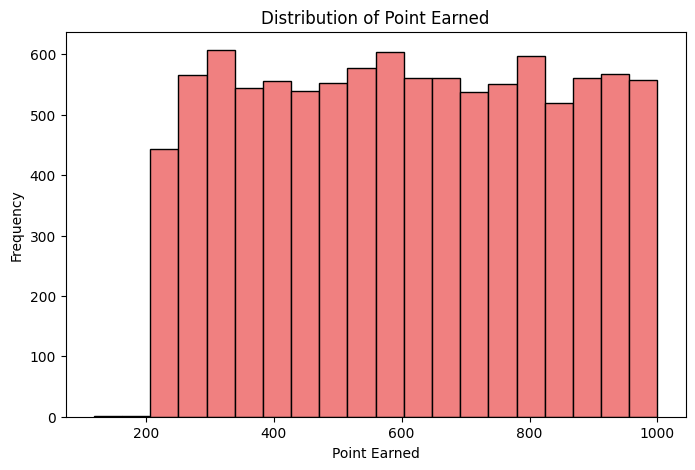

In [39]:
# Visualize distribution of int64 columns
for column in int_columns:
    plt.figure(figsize=(8, 5))
    df[column].plot(kind='hist', color='lightcoral', bins=20, edgecolor='black')
    plt.title("Distribution of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

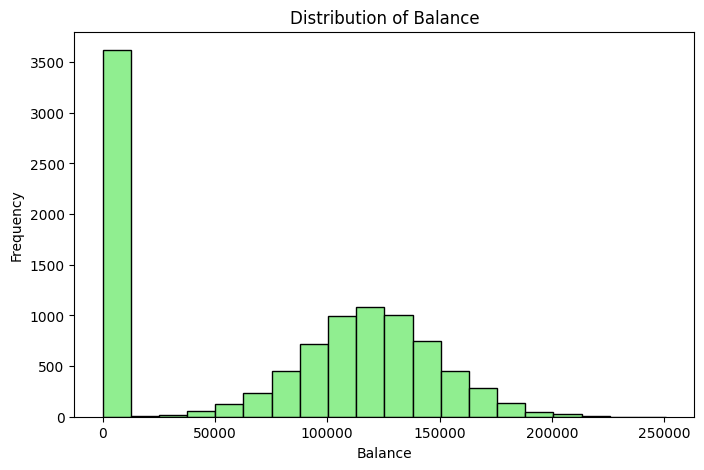

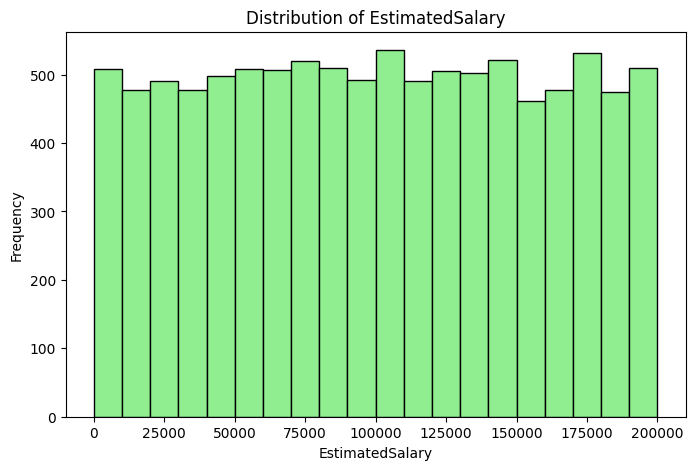

In [40]:
# Visualize distribution of float64 columns
for column in float_columns:
    plt.figure(figsize=(8, 5))
    df[column].plot(kind='hist', color='lightgreen', bins=20, edgecolor='black')
    plt.title("Distribution of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()